In [1]:
# potrzebne importy
from ultralytics import YOLO
from random import sample
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import cv2
import os

In [2]:
# ładuję model z pobranego pliku
model = YOLO("./models/yolov8m.pt")

# testowanie działania modelu na obrazie z kotem i psem obok siebie
result = model("./images/cat_and_dog.jpg", save=True)


image 1/1 c:\Users\micha\OneDrive\Documents\semestr7\MRO\laby\lab4\images\cat_and_dog.jpg: 512x640 1 cat, 1 dog, 389.3ms
Speed: 27.3ms preprocess, 389.3ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 640)
Results saved to C:\Users\micha\OneDrive\Documents\semestr7\MRO\laby\lab4\runs\detect\predict3


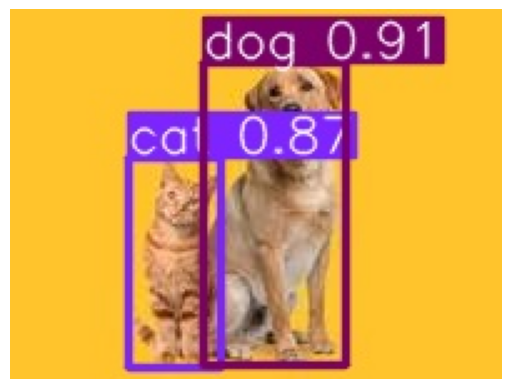

In [3]:
# wyświetlmy obraz z zaznaczonymi zwierzątkami
image = mpimg.imread("./runs/detect/predict/cat_and_dog.jpg")
plt.imshow(image)
plt.axis('off')
plt.show()

In [4]:
# wczytajmy pliki .csv w postaci DataFrame'ów
# źródło: https://storage.googleapis.com/openimages/v6/oidv6-train-annotations-bbox.csv
train_csv_df = pd.read_csv("./csvs/oidv6-train-annotations-bbox.csv")

# źródło: https://storage.googleapis.com/openimages/v5/validation-annotations-bbox.csv
val_csv_df = pd.read_csv("./csvs/validation-annotations-bbox.csv")

# informacje o tej klasie można znaleźć w poniżej podlinkowanym pliku
# źródło: https://storage.googleapis.com/openimages/v7/oidv7-class-descriptions.csv
food_label = "/m/02wbm"

In [5]:
# zapoznajmy się ze strukturą DataFrame'ów
print(train_csv_df.columns)
print()
print(val_csv_df.columns)
print()

# wyświetlmy przykładową kolumnę
print(train_csv_df['ImageID'])

Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside', 'XClick1X', 'XClick2X', 'XClick3X', 'XClick4X', 'XClick1Y',
       'XClick2Y', 'XClick3Y', 'XClick4Y'],
      dtype='object')

Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside'],
      dtype='object')

0           000002b66c9c498e
1           000002b66c9c498e
2           000002b66c9c498e
3           000002b66c9c498e
4           000002b66c9c498e
                  ...       
14610224    fffffdaec951185d
14610225    fffffdaec951185d
14610226    fffffdaec951185d
14610227    fffffdaec951185d
14610228    fffffdaec951185d
Name: ImageID, Length: 14610229, dtype: object


In [6]:
# przefiltrujmy DataFrame'y, żeby zachować informacje o obrazach z jedzeniem
food_train_df = train_csv_df[train_csv_df['LabelName'] == food_label]
food_val_df = val_csv_df[val_csv_df['LabelName'] == food_label]

# zobaczmy, jak wygląda DataFrame po przefiltrowaniu
food_train_df

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
181,000032046c3f8371,xclick,/m/02wbm,1,0.186250,0.759375,0.199475,0.658793,1,0,...,0,0,0.318125,0.186250,0.759375,0.496875,0.199475,0.394576,0.433071,0.658793
760,00006c07d2b033d1,activemil,/m/02wbm,1,0.303125,0.525000,0.732813,0.832812,-1,-1,...,-1,-1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
761,00006c07d2b033d1,xclick,/m/02wbm,1,0.496875,0.715625,0.717188,0.792188,1,0,...,0,0,0.654687,0.715625,0.584375,0.496875,0.717188,0.768750,0.792188,0.743750
762,00006c07d2b033d1,xclick,/m/02wbm,1,0.773438,0.843750,0.703125,0.751562,1,1,...,0,0,0.831250,0.843750,0.810937,0.773438,0.703125,0.707812,0.751562,0.728125
2047,00011aec5d7324f4,xclick,/m/02wbm,1,0.406250,0.501875,0.652661,0.705882,1,0,...,0,0,0.441875,0.406250,0.453125,0.501875,0.652661,0.689076,0.705882,0.687208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14609317,fffa3d98d4e01779,xclick,/m/02wbm,1,0.009375,0.731875,0.194375,0.604375,1,0,...,0,0,0.731875,0.658125,0.050000,0.009375,0.283125,0.194375,0.604375,0.481250
14609828,fffd69f5e9518a73,activemil,/m/02wbm,1,0.632812,0.979688,0.010417,0.208333,0,1,...,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
14609829,fffd69f5e9518a73,xclick,/m/02wbm,1,0.125000,0.328125,0.000000,0.139583,1,1,...,0,0,0.235937,0.125000,0.132812,0.328125,0.000000,0.108333,0.139583,0.000000
14609830,fffd69f5e9518a73,xclick,/m/02wbm,1,0.382812,0.675000,0.000000,0.058333,1,1,...,0,0,0.531250,0.382812,0.526563,0.675000,0.000000,0.000000,0.058333,0.004167


In [7]:
# stwórzmy zbiór id obrazów
train_images_ids_set = set(food_train_df['ImageID'])
val_images_ids_set = set(food_val_df['ImageID'])

# sprawdźmy, ile jest takich unikalnych obrazów treningowych i walidacyjnych
print(len(train_images_ids_set), len(val_images_ids_set))

25712 1696


In [8]:
# zapiszmy identyfikatory obrazów do pliku
os.makedirs("./images_ids", exist_ok=True)
train_output_filename = "./images_ids/train_images_ids.txt"
val_output_filename = "./images_ids/val_images_ids.txt"

if not os.path.exists(train_output_filename):
    # ograniczmy nieco liczbę obrazów do zapisania i pobrania
    train_images_ids = sample(sorted(train_images_ids_set), k=5000)

    with open(train_output_filename, "w") as f:
        for image_id in train_images_ids:
            f.write(f"train/{image_id}\n")
else:
    print("Plik z ID obrazów treningowych już istnieje!")

    # pobierzmy listę identyfikatorów z pliku
    with open(train_output_filename, "r") as f:
        lines = f.readlines()
        train_images_ids = []

        for line in lines:
            train_images_ids.append(line[6:])

if not os.path.exists(val_output_filename):
    # ograniczmy nieco liczbę obrazów do zapisania i pobrania
    val_images_ids = sample(sorted(val_images_ids_set), k=500)

    with open(val_output_filename, "w") as f:
        for image_id in val_images_ids:
            f.write(f"validation/{image_id}\n")
else:
    print("Plik z ID obrazów walidacyjnych już istnieje!")

    # pobierzmy listę identyfikatorów z pliku
    with open(val_output_filename, "r") as f:
        lines = f.readlines()
        val_images_ids = []

        for line in lines:
            val_images_ids.append(line[11:])

Plik z ID obrazów treningowych już istnieje!
Plik z ID obrazów walidacyjnych już istnieje!


In [9]:
# wskazuję ścieżki do zapisu obrazów treningowych/walidacyjnych
os.makedirs("./dataset/train", exist_ok=True)
os.makedirs("./dataset/val", exist_ok=True)
train_images_directory = "./dataset/train/images"
val_images_directory = "./dataset/val/images"

# uruchamiam skrypt `downloader.py` z odpowiednimi argumentami
if not os.path.exists(train_images_directory):
    os.mkdir(train_images_directory)
    os.system(f"py downloader.py {train_output_filename} --download_folder={train_images_directory}")
else:
    print("Obrazy do treningu już zostały pobrane!")

if not os.path.exists(val_images_directory):
    os.mkdir(val_images_directory)
    os.system(f"py downloader.py {val_output_filename} --download_folder={val_images_directory}")
else:
    print("Obrazy do walidacji już zostały pobrane!")

Obrazy do treningu już zostały pobrane!
Obrazy do walidacji już zostały pobrane!


In [10]:
# tworzę DataFrame'y z wartościami używanymi w formacie YOLO
train_bbs_df = food_train_df.copy()
val_bbs_df = food_val_df.copy()

# format YOLO wymaga współrzędnych środka oraz wymiarów bounding boxa
train_bbs_df['x_center'] = (food_train_df['XMin'] + food_train_df['XMax']) / 2
train_bbs_df['y_center'] = (food_train_df['YMin'] + food_train_df['YMax']) / 2
train_bbs_df['width'] = food_train_df['XMax'] - food_train_df['XMin']
train_bbs_df['height'] = food_train_df['YMax'] - food_train_df['YMin']

val_bbs_df['x_center'] = (food_val_df['XMin'] + food_val_df['XMax']) / 2
val_bbs_df['y_center'] = (food_val_df['YMin'] + food_val_df['YMax']) / 2
val_bbs_df['width'] = food_val_df['XMax'] - food_val_df['XMin']
val_bbs_df['height'] = food_val_df['YMax'] - food_val_df['YMin']

# upewnijmy się, czy mamy odpowiednie kolumny
print(train_bbs_df.columns)
print()
print(val_bbs_df.columns)

Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside', 'XClick1X', 'XClick2X', 'XClick3X', 'XClick4X', 'XClick1Y',
       'XClick2Y', 'XClick3Y', 'XClick4Y', 'x_center', 'y_center', 'width',
       'height'],
      dtype='object')

Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside', 'x_center', 'y_center', 'width', 'height'],
      dtype='object')


In [11]:
# wskazuję ścieżki do zapisu informacji o bounding boxach w formacie YOLO
train_labels_directory = "./dataset/train/labels"
val_labels_directory = "./dataset/val/labels"

if not os.path.exists(train_labels_directory):
    os.mkdir(train_labels_directory)

    for image_id in train_images_ids:
        image_bbs = train_bbs_df[train_bbs_df['ImageID'] == image_id]

        with open(f"{train_labels_directory}/{image_id}.txt", "w") as f:
            for _, bb in image_bbs.iterrows():
                f.write(f"0 {bb['x_center']} {bb['y_center']} {bb['width']} {bb['height']}\n")
else:
    print("Pliki z bounding boxami dla obrazów treningowych już zostały stworzone!")

if not os.path.exists(val_labels_directory):
    os.mkdir(val_labels_directory)

    for image_id in val_images_ids:
        image_bbs = val_bbs_df[val_bbs_df['ImageID'] == image_id]

        with open(f"{val_labels_directory}/{image_id}.txt", "w") as f:
            for _, bb in image_bbs.iterrows():
                f.write(f"0 {bb['x_center']} {bb['y_center']} {bb['width']} {bb['height']}\n")
else:
    print("Pliki z bounding boxami dla obrazów walidacyjnych już zostały stworzone!")

Pliki z bounding boxami dla obrazów treningowych już zostały stworzone!
Pliki z bounding boxami dla obrazów walidacyjnych już zostały stworzone!


In [12]:
# po treningu zapisuję najlepszy model, żeby nie powtarzać procedury
trained_model_path = "./models/yolov8n_finetuned.pt"

if not os.path.exists(trained_model_path):
    # ładuję mniejszy model z pobranego pliku
    model = YOLO("./models/yolov8n.pt")

    # trening modelu przez 5 epok
    results = model.train(
        data="./dataset.yaml",
        epochs=5,
        imgsz=640,
        batch=16,
        workers=8,
        verbose=False,
        name="custom_yolo_run"
    )

    # ścieżka do najlepszych wag modelu
    best_model_path = "./runs/detect/custom_yolo_run/weights/best.pt"

    # wczytanie wytrenowanego modelu
    model = YOLO(best_model_path)

    # zapisanie modelu, co może przydać się później
    model.save(trained_model_path)
else:
    print(f"Model już został wytrenowany! Wczytuję najlepszy model z {trained_model_path}")
    model = YOLO(trained_model_path)


Model już został wytrenowany! Wczytuję najlepszy model z ./models/yolov8n_finetuned.pt


In [13]:
# wczytanie pliku z wynikami
results_df = pd.read_csv("./runs/detect/custom_yolo_run/results.csv")

# kolumny z wartościami funkcji kosztu
train_box_loss = results_df['train/box_loss']
train_cls_loss = results_df['train/cls_loss']
train_dfl_loss = results_df['train/dfl_loss']

val_box_loss = results_df['val/box_loss']
val_cls_loss = results_df['val/cls_loss']
val_dfl_loss = results_df['val/dfl_loss']

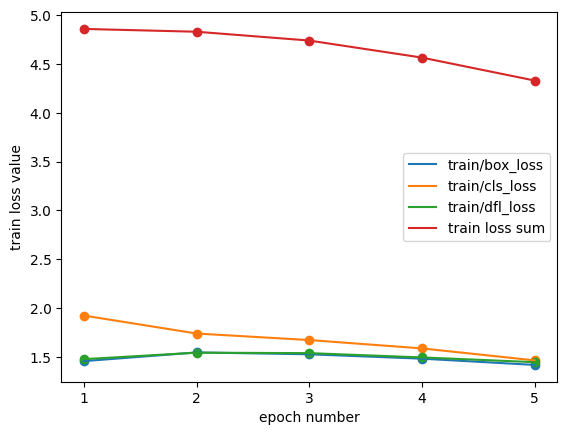

In [14]:
# przedstawmy wartości dla treningu na wykresie
epochs = [i for i in range(1, 6)]
plt.plot(epochs, train_box_loss, label="train/box_loss")
plt.plot(epochs, train_cls_loss, label="train/cls_loss")
plt.plot(epochs, train_dfl_loss, label="train/dfl_loss")
plt.plot(epochs, train_box_loss + train_cls_loss + train_dfl_loss, label="train loss sum")

plt.scatter(epochs, train_box_loss)
plt.scatter(epochs, train_cls_loss)
plt.scatter(epochs, train_dfl_loss)
plt.scatter(epochs, train_box_loss + train_cls_loss + train_dfl_loss)

plt.legend()
plt.xticks(epochs)
plt.xlabel("epoch number")
plt.ylabel("train loss value")
plt.show()

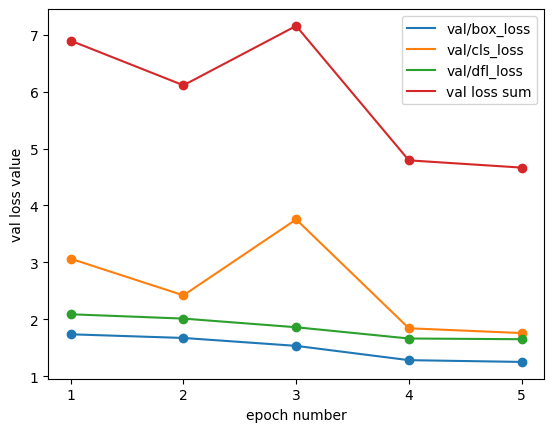

In [15]:
# to samo dla zbioru walidacyjnego
plt.plot(epochs, val_box_loss, label="val/box_loss")
plt.plot(epochs, val_cls_loss, label="val/cls_loss")
plt.plot(epochs, val_dfl_loss, label="val/dfl_loss")
plt.plot(epochs, val_box_loss + val_cls_loss + val_dfl_loss, label="val loss sum")

plt.scatter(epochs, val_box_loss)
plt.scatter(epochs, val_cls_loss)
plt.scatter(epochs, val_dfl_loss)
plt.scatter(epochs, val_box_loss + val_cls_loss + val_dfl_loss)

plt.legend()
plt.xticks(epochs)
plt.xlabel("epoch number")
plt.ylabel("val loss value")
plt.show()


image 1/1 c:\Users\micha\OneDrive\Documents\semestr7\MRO\laby\lab4\test_images_1\image1.jpg: 480x640 4 foods, 152.8ms
Speed: 15.0ms preprocess, 152.8ms inference, 22.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to C:\Users\micha\OneDrive\Documents\semestr7\MRO\laby\lab4\runs\detect\predict4

image 1/1 c:\Users\micha\OneDrive\Documents\semestr7\MRO\laby\lab4\test_images_1\image2.jpg: 480x640 1 food, 66.1ms
Speed: 3.8ms preprocess, 66.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to C:\Users\micha\OneDrive\Documents\semestr7\MRO\laby\lab4\runs\detect\predict4

image 1/1 c:\Users\micha\OneDrive\Documents\semestr7\MRO\laby\lab4\test_images_1\image3.jpg: 480x640 3 foods, 63.6ms
Speed: 4.1ms preprocess, 63.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to C:\Users\micha\OneDrive\Documents\semestr7\MRO\laby\lab4\runs\detect\predict4

image 1/1 c:\Users\micha\OneDrive\Documents\semestr7\MRO\laby\lab4

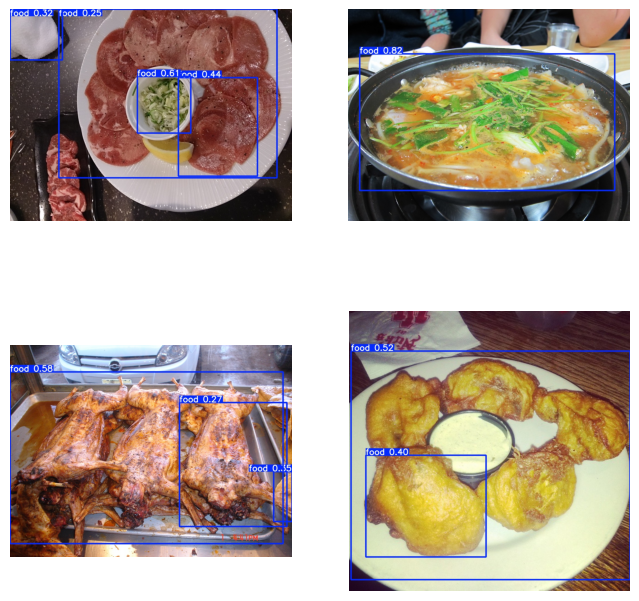

In [16]:
# użycie sieci do predykcji na paru obrazkach testowych
_, ax = plt.subplots(2, 2, figsize=(8, 8))

for i in range(4):
    result = model(f"./test_images_1/image{i+1}.jpg", save=True)
    image = mpimg.imread(f"./runs/detect/predict2/image{i+1}.jpg")
    ax[i//2][i%2].imshow(image)
    ax[i//2][i%2].axis('off')

plt.show()

In [17]:
# funkcja cenzurująca jedzenie na obrazach
def censor(image_path, result):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    bboxes = result[0].boxes.xyxy.numpy().astype(np.int32)

    for bbox in bboxes:
        x_min, y_min, x_max, y_max = bbox 
        censored_part = image[y_min:y_max, x_min:x_max, :]
        censored_part = cv2.GaussianBlur(censored_part, (101, 101), 0)
        image[y_min:y_max, x_min:x_max, :] = censored_part
    
    return image


image 1/1 c:\Users\micha\OneDrive\Documents\semestr7\MRO\laby\lab4\test_images_2\image1.jpg: 640x640 2 foods, 85.4ms
Speed: 8.5ms preprocess, 85.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\micha\OneDrive\Documents\semestr7\MRO\laby\lab4\test_images_2\image2.jpg: 480x640 1 food, 64.6ms
Speed: 4.3ms preprocess, 64.6ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\micha\OneDrive\Documents\semestr7\MRO\laby\lab4\test_images_2\image3.jpg: 480x640 3 foods, 61.4ms
Speed: 3.4ms preprocess, 61.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\micha\OneDrive\Documents\semestr7\MRO\laby\lab4\test_images_2\image4.jpg: 448x640 1 food, 80.5ms
Speed: 3.8ms preprocess, 80.5ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 c:\Users\micha\OneDrive\Documents\semestr7\MRO\laby\lab4\test_images_2\image5.jpg: 640x480 1 food, 82.2ms
Speed: 4.5ms preprocess, 

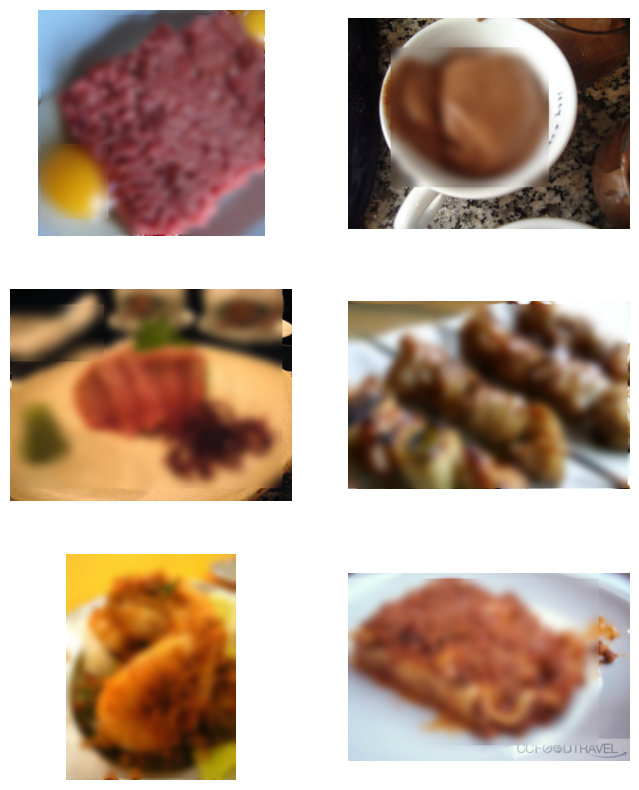

In [18]:
_, ax = plt.subplots(3, 2, figsize=(8, 10))

for i in range(6):
    image_path = f"./test_images_2/image{i+1}.jpg"
    result = model(image_path, save=False)
    censored_image = censor(image_path, result)
    ax[i//2][i%2].imshow(censored_image)
    ax[i//2][i%2].axis('off')

plt.show()